IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD CSV

In [2]:
salarios = pd.read_csv('salaries.csv')

INSPECT THE CONTENTS OF THE DATASET

In [3]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                4828 non-null   int64 
 1   job_title           4828 non-null   object
 2   experience_level    4828 non-null   object
 3   employment_type     4828 non-null   object
 4   salary              4828 non-null   int64 
 5   salary_currency     4828 non-null   object
 6   salary_in_usd       4828 non-null   int64 
 7   company_location    4828 non-null   object
 8   employee_residence  4828 non-null   object
 9   % Remote_work       4828 non-null   int64 
 10  company_size        4828 non-null   object
dtypes: int64(4), object(7)
memory usage: 415.0+ KB


In [4]:
salarios.describe()

,Year,salary,salary_in_usd,% Remote_work
count,4828.000000,4.828000e+03,4828.000000,4828.000000
mean,2022.633803,1.910575e+05,144745.027548,45.577879
std,0.644102,6.130726e+05,67605.680330,48.678598
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2023.000000,1.410500e+05,139650.000000,0.000000
75%,2023.000000,1.900000e+05,185475.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


WE LOOK AT THE CONTENTS OF THE DATASET

In [5]:
salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


EN: Entry-level / Junior
MI: Mid-level / Intermediate
SE: Senior-level / Expert
EX: Executive-level / Director

employment_type:
PT: Part-time
FT: Full-time
CT: Contract
FL: Freelance

remote_ratio: 
0: No remote work (less than 20%)
50: Partially remote/hybrid
100: Fully remote (more than 80%)

company_size:
S: less than 50 employees (small)
M: 50 to 250 employees (medium)
L: more than 250 employees (large)

salary: The total gross salary amount paid.
salary_currency: The currency of the salary paid as an ISO 4217 currency code.
salary_in_usd: The salary in USD (FX rate divided by avg. USD rate of respective year via data from fxdata.foorilla.com).
employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code

WE VERIFY THAT THERE IS NO NULL DATA

In [6]:
print(salarios.isnull().sum())

Year                  0
job_title             0
experience_level      0
employment_type       0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
employee_residence    0
% Remote_work         0
company_size          0
dtype: int64


WE VERIFY THAT THERE IS NO DUPLICATED DATA

In [7]:
print(salarios.duplicated().sum())

0


In [8]:
salarios = salarios.drop_duplicates()
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4828 entries, 0 to 4827
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                4828 non-null   int64 
 1   job_title           4828 non-null   object
 2   experience_level    4828 non-null   object
 3   employment_type     4828 non-null   object
 4   salary              4828 non-null   int64 
 5   salary_currency     4828 non-null   object
 6   salary_in_usd       4828 non-null   int64 
 7   company_location    4828 non-null   object
 8   employee_residence  4828 non-null   object
 9   % Remote_work       4828 non-null   int64 
 10  company_size        4828 non-null   object
dtypes: int64(4), object(7)
memory usage: 415.0+ KB


In [9]:
salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


WE RENAME THE NAME OF SOME COLUMNS TO FACILITATE THE WRITING OF THE REST OF THE CODES

In [10]:
salarios = salarios.rename(columns={'work_year':'Year', 'remote_ratio':'% Remote_work'})

In [11]:
salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


WE SORT THE POSITION OF THE COLUMNS

In [12]:
salarios = salarios[['Year','job_title','experience_level','employment_type','salary','salary_currency','salary_in_usd','company_location','employee_residence','% Remote_work',
                     'company_size']]

In [13]:
salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


MODIFY THE ABBREVIATED VALUES OF THE COLUMNS AND PLACE THE CORRESPONDING VALUE

In [14]:
size_dicc = {'L': 'Large', 'M': 'Medium', 'S':'Small'}

salarios['company_size'] = salarios['company_size'].replace(size_dicc)

salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


MODIFY THE ABBREVIATED VALUES OF THE COLUMNS AND PLACE THE CORRESPONDING VALUE

In [15]:
level_dicc = {'EN': 'Entry/Junior', 'MI': 'Mid/Intermediate', 'SE':'Senior/Expert','EX':'Executive/Director'}

salarios['experience_level'] = salarios['experience_level'].replace(level_dicc)

salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


MODIFY THE ABBREVIATED VALUES OF THE COLUMNS AND PLACE THE CORRESPONDING VALUE

In [16]:
employement_dicc = {'PT': 'Part-time', 'FT': 'Full-time', 'CT':'Contract','FL':'Freelance'}

salarios['employment_type'] = salarios['employment_type'].replace(employement_dicc)

salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


In [17]:
salarios.to_csv('salaries.csv', index=False)

WE MAKE A COUNT TO FINISH THE NUMBER OF ROWS WE HAVE EACH YEAR

In [18]:
year_count = salarios['Year'].value_counts()
print(year_count)

Year
2023    3426
2022    1111
2021     216
2020      75
Name: count, dtype: int64


WE MADE A BAR CHART TO FIND OUT WHICH TYPE OF WORK EXPERIENCE IS THE MOST PREDOMINANT IN THE DATASET REGARDLESS OF THE TYPE OF JOB.

<Axes: ylabel='count'>

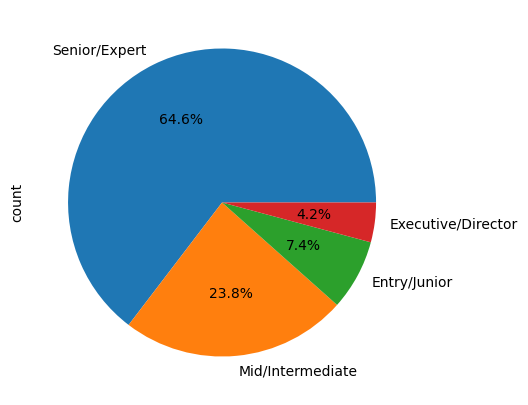

In [19]:
salarios['experience_level'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize=(5,5))


In [20]:
employment_count = salarios['employment_type'].value_counts()
print(employment_count)

employment_type
Full-time    4786
Contract       18
Part-time      13
Freelance      11
Name: count, dtype: int64


WE OBSERVE THROUGH THE COUNT THAT THE DATA IN THE DATASET INDICATES THAT FULL-TIME JOBS PREDOMINATE TO A LARGE EXTENT AND THAT FREELANCE JOBS, AT LEAST WITHIN THIS DATASET, ARE THE ONES WITH THE LOWEST NUMBER OF JOBS.
DATASET ARE THE ONES WITH THE LEAST AMOUNT OF FREELANCE JOBS.

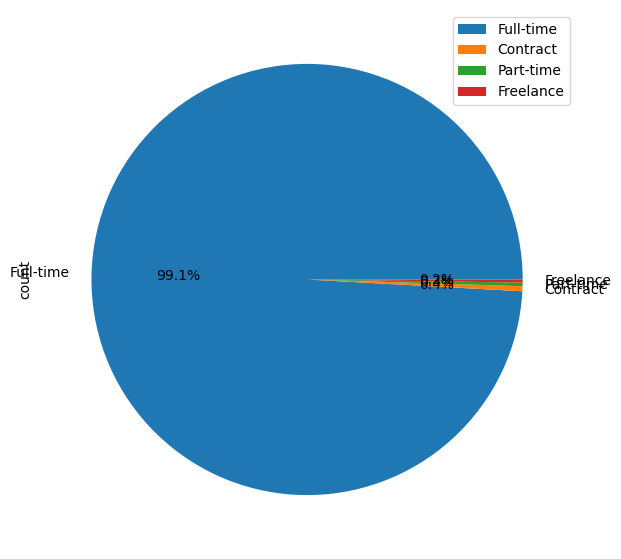

In [21]:
salarios['employment_type'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize=(7,7)).legend()

WITH A COUNT, WE OBSERVE THE NUMBER OF WORKERS THAT PREDOMINATE WITHIN EACH WORK AREA.

In [22]:
job_count = salarios['job_title'].value_counts().head()
print(job_count)

job_title
Data Engineer                1004
Data Scientist                922
Data Analyst                  673
Machine Learning Engineer     461
Analytics Engineer            183
Name: count, dtype: int64


<Axes: ylabel='count'>

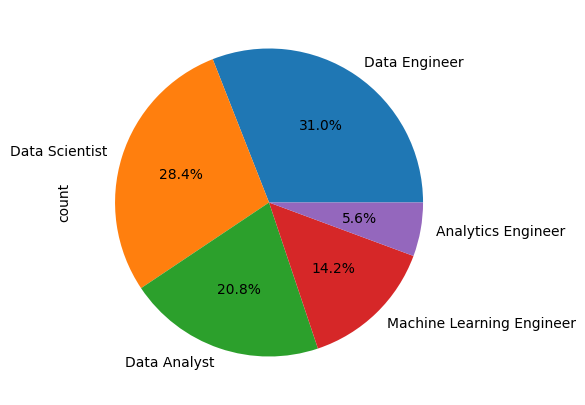

In [23]:
salarios['job_title'].value_counts().head().plot(kind='pie', autopct = '%1.1f%%', figsize=(5,5))



In [24]:
salary_count = salarios['salary'].value_counts().head()
print(salary_count)

salary
100000    99
150000    83
120000    80
80000     69
200000    69
Name: count, dtype: int64


WE FILTER OUT THE HIGHEST SALARY EARNED REGARDLESS OF THE TYPE OF WORK AND/OR EXPERIENCE OF THE INDIVIDUAL

<Axes: ylabel='count'>

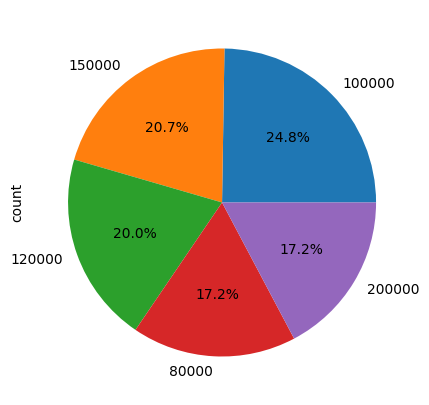

In [25]:
salarios['salary'].value_counts().head().plot(kind='pie', autopct = '%1.1f%%', figsize=(5,5))

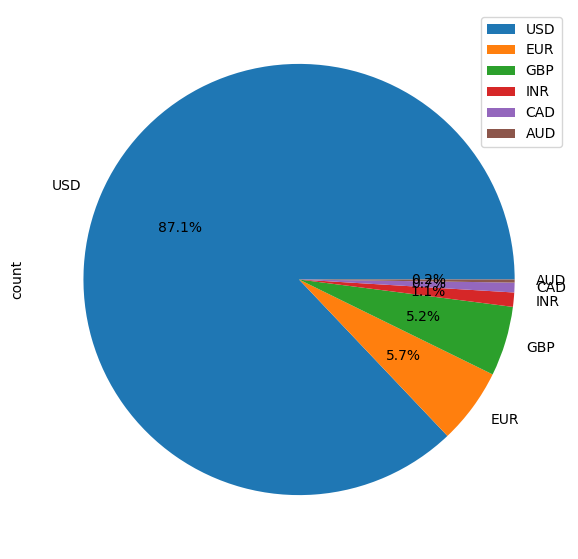

In [26]:
salarios['salary_currency'].value_counts().head(6).plot(kind='pie', autopct = '%1.1f%%', figsize=(7,7)).legend()


WHAT ARE THE MOST PREDOMINANT SALARIES IN USD?

<Axes: ylabel='count'>

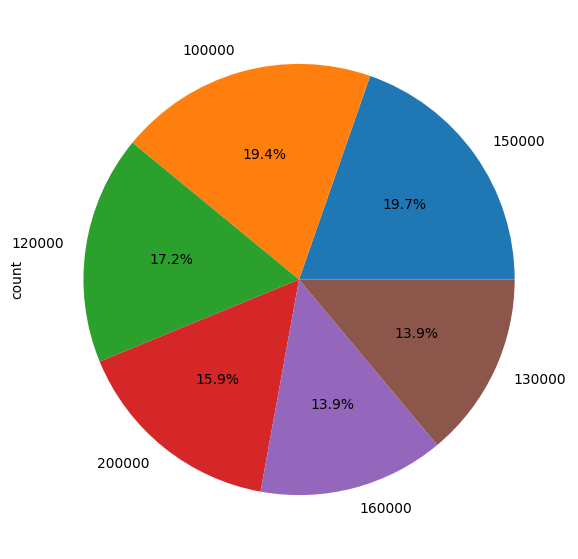

In [27]:
salarios['salary_in_usd'].value_counts().head(6).plot(kind='pie', autopct = '%1.1f%%', figsize=(7,7))


NUMBER OF COMPANIES THAT PREDOMINATE BY LOCATION

<Axes: ylabel='count'>

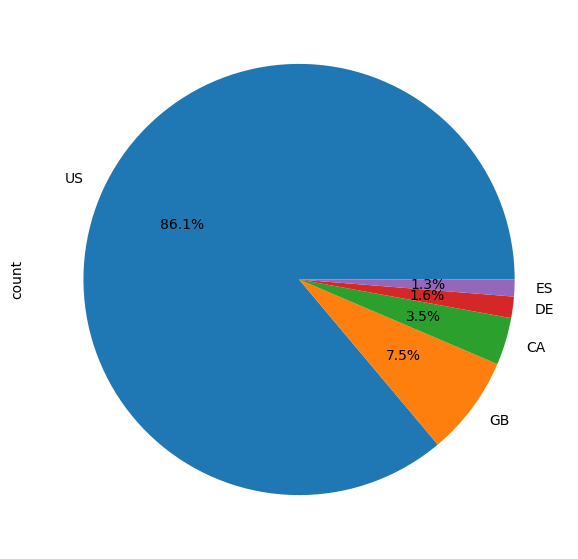

In [28]:
salarios['company_location'].value_counts().head().plot(kind='pie', autopct = '%1.1f%%', figsize=(7,7))

PERCENTAGE EMPLOYEE RESIDENCY

<Axes: ylabel='count'>

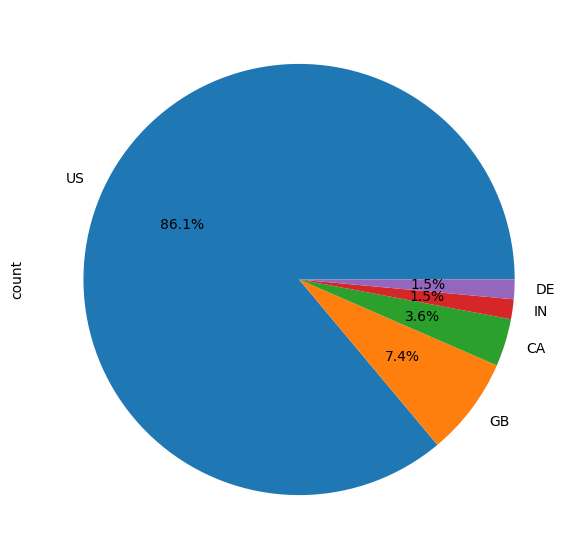

In [29]:
salarios['employee_residence'].value_counts().head().plot(kind='pie', autopct = '%1.1f%%', figsize=(7,7))


PERCENTAGE OF REMOTE WORK

<Axes: ylabel='count'>

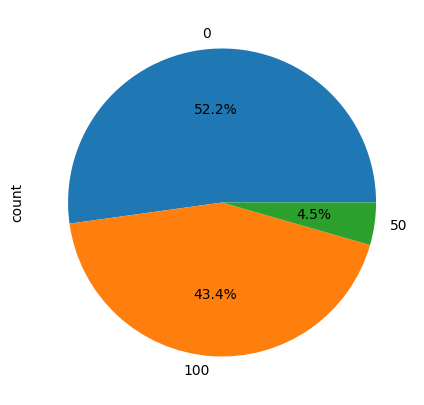

In [30]:
salarios['% Remote_work'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize=(5,5))



WE CAN SEE THAT MEDIUM-SIZED COMPANIES PREDOMINATE OVER LARGE AND SMALL COMPANIES.

<Axes: ylabel='count'>

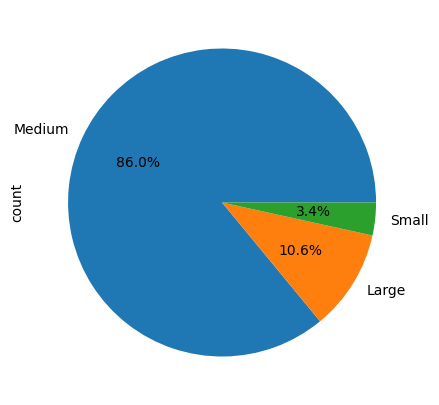

In [31]:
salarios['company_size'].value_counts().plot(kind='pie', autopct = '%1.1f%%', figsize=(5,5))



In [32]:
salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


Text(0, 0.5, 'Jobs')

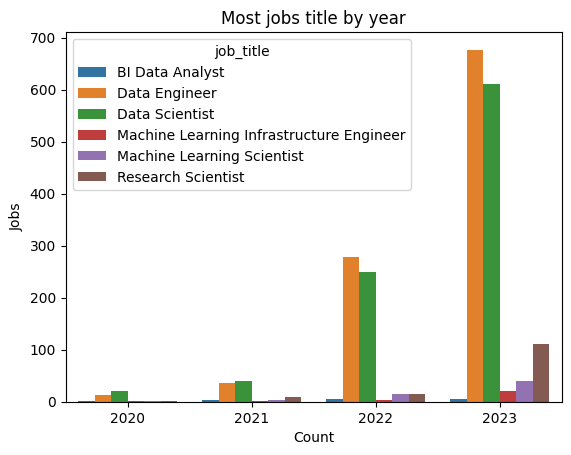

In [33]:
year_job = salarios.groupby(['job_title','Year']).size().reset_index(name='count')
top_10_jobs = year_job['job_title'].value_counts().head(6).index
year_job_top_10 = year_job[year_job['job_title'].isin(top_10_jobs)]
sns.barplot(data=year_job_top_10, x='Year', y='count', hue='job_title')
plt.title('Most jobs title by year')
plt.xlabel('Count')
plt.ylabel('Jobs')


IN THE FOLLOWING BAR CHART WE CAN SEE AND COMPARE THE GROWTH OF THE WORK AREAS BY YEARS, WE CAN OBSERVE THAT THE MOST OUTSTANDING GROWTH OVER THE YEARS IS ATTRIBUTED TO THE DATA AREA, ESPECIALLY DATA ENGINEER AND DATA SCIENISTS.
EXPONENTIAL GROWTH OVER THE YEARS IS ATTRIBUTED TO THE DATA AREA, ESPECIALLY DATA ENGINEER AND DATA SCIENISTS.

Text(0, 0.5, 'Employment Type')

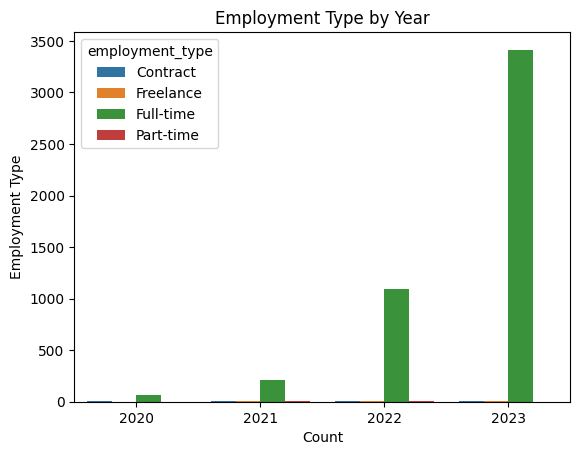

In [35]:
year_employment = salarios.groupby(['employment_type','Year']).size().reset_index(name='count')
top_employment = year_employment['employment_type'].value_counts().index
year_employment_top = year_employment[year_employment['employment_type'].isin(top_employment)]
sns.barplot(data=year_employment_top, x='Year', y='count', hue='employment_type')
plt.title('Employment Type by Year')
plt.xlabel('Count')
plt.ylabel('Employment Type')

WE CAN SEE THAT THE GROWTH OF FULL-TIME WORK OVER THE YEARS, WAS GROWING EXPONENTIALLY, FROM MY POINT OF VIEW IT IS A GROWTH
I THINK IT IS A LITTLE EXPECTED GROWTH SINCE WE ARE GOING THROUGH A PANDEMIC AND HOME OFFICE WORK WOULD BE MORE PREDOMINANT, BUT AT LEAST WITHIN THE DATA OF THIS DATASET IT SHOWS THE OPPOSITE.
OPPOSITE

Text(0, 0.5, '% Remote_work')

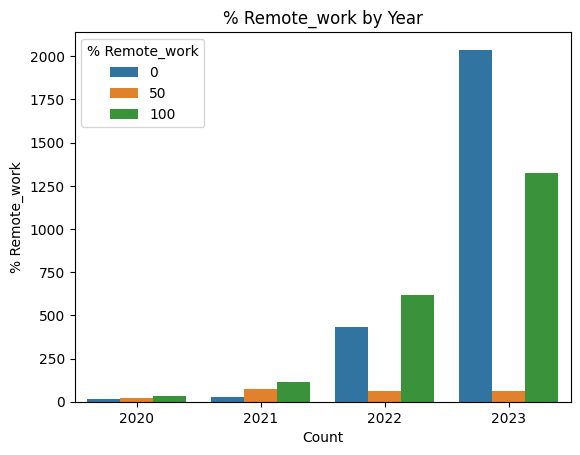

In [37]:
year_remote = salarios.groupby(['% Remote_work','Year']).size().reset_index(name='count')
top_remote = year_remote['% Remote_work'].value_counts().index
year_remote_top = year_remote[year_remote['% Remote_work'].isin(top_remote)]
sns.barplot(data=year_remote_top, x='Year', y='count', hue='% Remote_work')
plt.title('% Remote_work by Year')
plt.xlabel('Count')
plt.ylabel('% Remote_work')

AFTER ANALYZING THE GROWTH OF THE TYPE OF WORK OVER THE YEARS, WE CAN OBSERVE THAT AT PRESENT REMOTE WORK IS PREDOMINATING TO A GREAT EXTENT.
AND DURING THE YEAR 2023 THE GROWTH WAS SO GREAT THAT IT IS POSITIONED AS SOMETHING FUNDAMENTAL FOR EVERY WORKER IN THE IT WORLD.

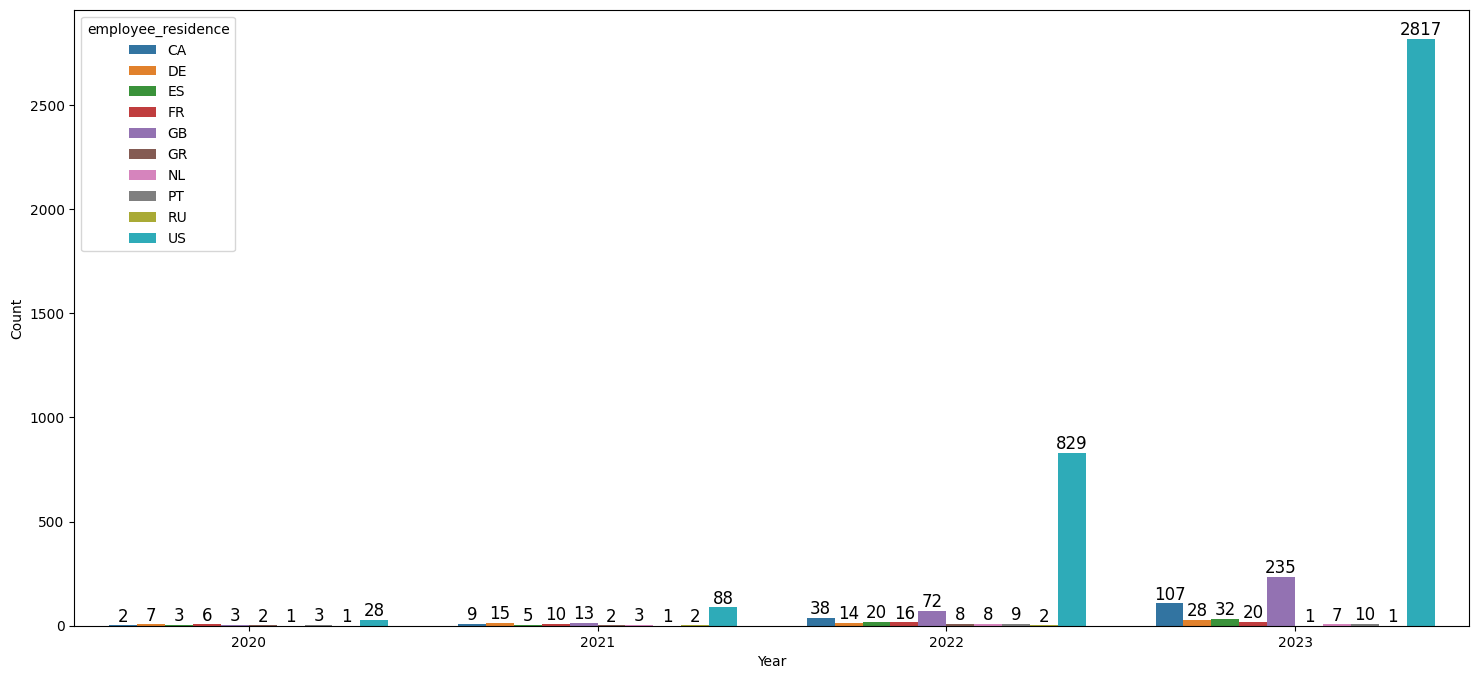

In [41]:
fig, axis1 = plt.subplots(1,1,figsize=(18,8))
average_residence = salarios[salarios['Year'].between(2020, 2023)].groupby(['employee_residence', 'Year']).size().reset_index(name='Count')
average_residence = average_residence[average_residence['employee_residence'].isin(average_residence['employee_residence'].value_counts().head(10).index)]
barplot = sns.barplot(x='Year', y='Count', hue='employee_residence', data=average_residence)

for p in barplot.patches:
    barplot.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
                 fontsize=12, color='black', ha='center', va='bottom')

plt.show()

IN THE YEARS FROM 2020 TO 2023, THE RESIDENCE OF THE EMPLOYEES WILL PREDOMINANTLY BE IN THE UNITED STATES, BUT WE MUST NOT LOSE SIGHT OF THE FACT THAT GREAT BRITAIN IS GROWING, SO WE COULD SEE A NOTABLE GROWTH IN THE NEXT YEAR, PERHAPS EVEN MORE SO IN THE NEXT FEW YEARS.
THAT GREAT BRITAIN IS IN GROWTH, SO WE COULD SEE A REMARKABLE GROWTH FROM THEM IN THE NEXT YEAR OR SO, PERHAPS IN THE NEXT FEW YEARS.

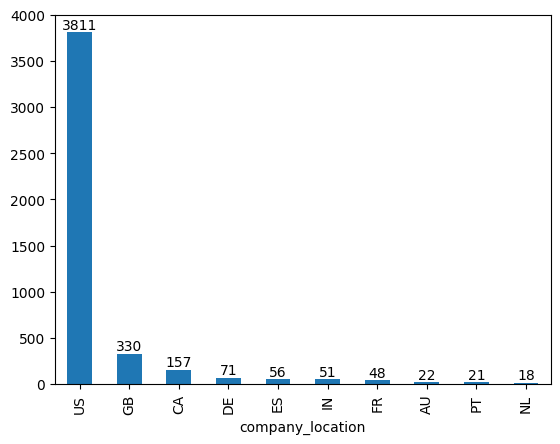

In [42]:
top_location = salarios['company_location'].value_counts().head(10)
ax = top_location.plot(kind='bar')
for i, v in enumerate(top_location):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
plt.show()

In [44]:
salarios.head()

,Year,job_title,experience_level,employment_type,salary,salary_currency,salary_in_usd,company_location,employee_residence,% Remote_work,company_size
0,2023,Business Data Analyst,Senior/Expert,Full-time,65000,GBP,79976,GI,ES,100,Large
1,2023,Business Intelligence Analyst,Senior/Expert,Full-time,115600,USD,115600,US,US,0,Medium
2,2023,Business Intelligence Analyst,Senior/Expert,Full-time,79700,USD,79700,US,US,0,Medium
3,2023,Applied Scientist,Entry/Junior,Full-time,281700,USD,281700,US,US,0,Medium
4,2023,Applied Scientist,Entry/Junior,Full-time,141100,USD,141100,US,US,0,Medium


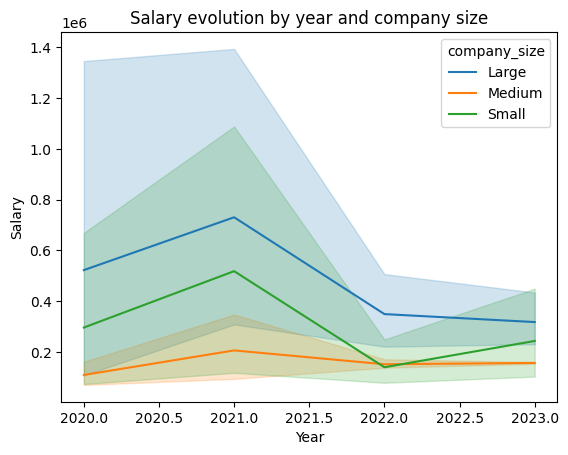

In [61]:
sns.lineplot(data=salarios, x='Year', y='salary', hue='company_size')

plt.title('Salary evolution by year and company size')
plt.xlabel('Year')
plt.ylabel('Salary')

plt.show()

WE CAN OBSERVE THAT THE BIG COMPANIES HAVE FOR OBVIOUS REASONS A MUCH HIGHER EVOLUTION OF THEIR SALARIES DURING 2020 UNTIL 2022 WHERE WE CAN SEE THEIR SUDDEN DROP IN SALARIES AND THE MEDIUM COMPANIES START TO GROW AND PROVIDE BETTER SALARIES FROM 2022 AND START TO GROW DURING 2023.
AND THE MEDIUM SIZED COMPANIES START TO GROW AND PROVIDE BETTER SALARIES FROM 2022 AND START TO GROW DURING THE COURSE OF 2023.

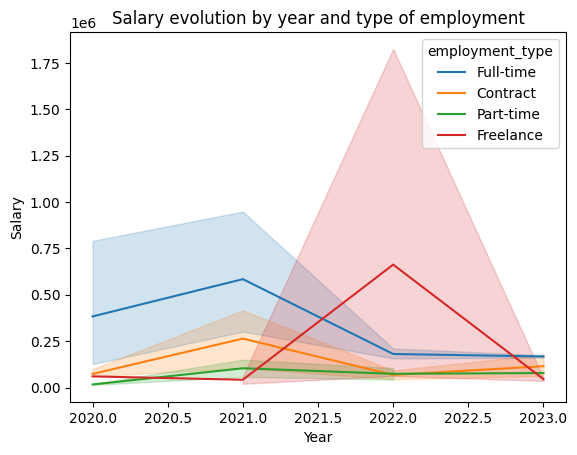

In [62]:
sns.lineplot(data=salarios, x='Year', y='salary', hue='employment_type')

plt.title('Salary evolution by year and type of employment')
plt.xlabel('Year')
plt.ylabel('Salary')

plt.show()

FREELANCE WORK HAD AN EXPONENTIAL GROWTH DURING 2021 AND 2023 WHICH IS CLEARLY GENERATED NOT ONLY BY THE PANDEMIC BUT ALSO BY THE POSSIBILITY OF DOING REMOTE WORK AND GAINING EXPERIENCE FOR THOSE PEOPLE WHO CANNOT MANAGE TO BE INSERTED IN A COMPANY.
REMOTE WORK AND GAINING EXPERIENCE FOR THOSE PEOPLE WHO CAN NOT ACHIEVE INSERTION IN A COMPANY, AS WE APPROACH THE YEAR 2023 AND BEGINS TO DECREASE THE FREELANCE JOBS, WE COULD DETERMINE THAT THOSE WHO CAN NOT ACHIEVE
AS WE APPROACH THE YEAR 2023 AND FREELANCE JOBS START TO DECREASE, WE COULD DETERMINE THAT THOSE PEOPLE WHO DEDICATED THEIR TIME TO FREELANCE WORK WILL BE ABLE TO FIND A JOB IN A COMPANY.

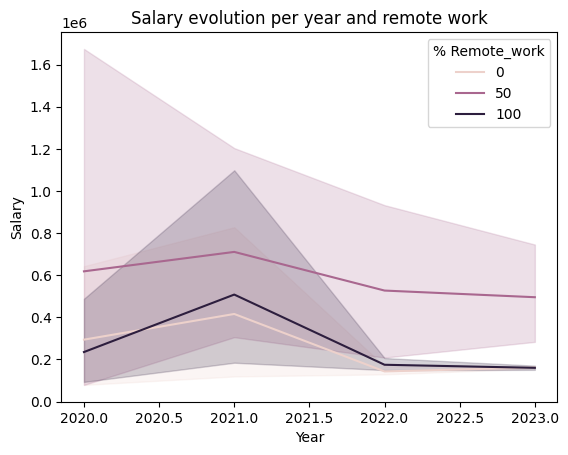

In [63]:
sns.lineplot(data=salarios, x='Year', y='salary', hue='% Remote_work')

plt.title('Salary evolution per year and remote work')
plt.xlabel('Year')
plt.ylabel('Salary')

plt.show()

WHILE FACE-TO-FACE WORK REMAINS AT THE TOP, OVER THE YEARS FROM 2020 TO 2023 WE CAN SEE HOW IT BEGINS TO FALL AND HYBRID JOBS BEGIN TO GROW EXPONENTIALLY ALONG WITH REMOTE WORK UNTIL EARLY 2022 WHERE THE REAL SITUATION NORMALIZES RELATED TO THE PANDEMIC AND THE
START TO GROW EXPONENTIALLY ALONG WITH REMOTE WORK UNTIL EARLY 2022 WHERE THE PANDEMIC-RELATED SITUATION NORMALIZES AND REMOTE WORK STARTS TO GROW AGAIN.
WORK STARTS TO GROW AGAIN

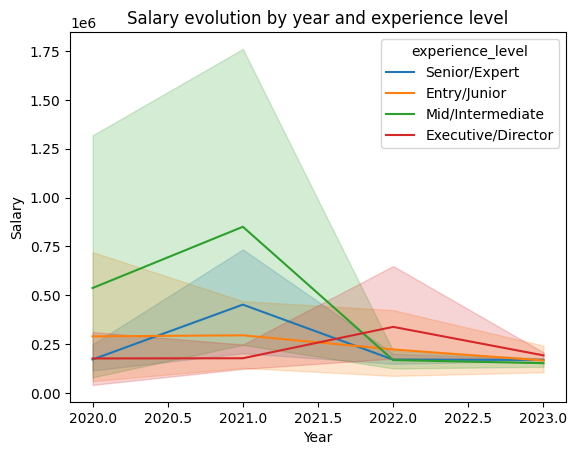

In [64]:
sns.lineplot(data=salarios, x='Year', y='salary', hue='experience_level')

plt.title('Salary evolution by year and experience level')
plt.xlabel('Year')
plt.ylabel('Salary')

plt.show()

AS WE CAN SEE IN THE GRAPH, THE SALARY GROWTH OF THOSE WITH A MEDIUM/INTERMEDIATE LEVEL OF EXPERIENCE STARTED TO DECLINE DRAMATICALLY DURING 2021 AND CONTINUED UNTIL THE BEGINNING OF 2022 WHERE IT REMAINED AND STAGNATED UNTIL THE COURSE OF 2023.
DURING 2021 AND CONTINUED UNTIL THE BEGINNING OF 2022 WHERE IT WAS MAINTAINED AND STAGNATED UNTIL THE COURSE OF 2023, SENIOR/EXPERT SALARIES BEGAN TO GROW DURING 2020 AND AT THE INSTANT THAT EXECUTIVE/DIRECTOR SALARIES BEGAN TO GROW, SENIOR/EXPERT SALARIES BEGAN TO FALL INSTANTLY, ON THE OTHER HAND, THOSE WITH EXECUTIVE/DIRECTOR RANK, ALTHOUGH WE CAN OBSERVE THAT THE EXECUTRIVE/DIRECTOR RANK STARTED TO GROW DRASTICALLY DURING 2021 AND TO DECLINE DURING 2022 UNTIL THE END OF 2023, THEY HAVE A RELATIVELY SIMILAR PERFORMANCE WITHOUT TAKING INTO ACCOUNT THE YEAR IN WHICH THE RESPECTIVE GROWTH AND FALL OF EACH ONE BEGINS, WE CANNOT IGNORE THAT THE SALARY OF THE ENTRY/JUNIOR DECLINED BUT REMAINS ABOVE THE MID/INTERMEDIATE DURING THE EVOLUTION OF 2023.

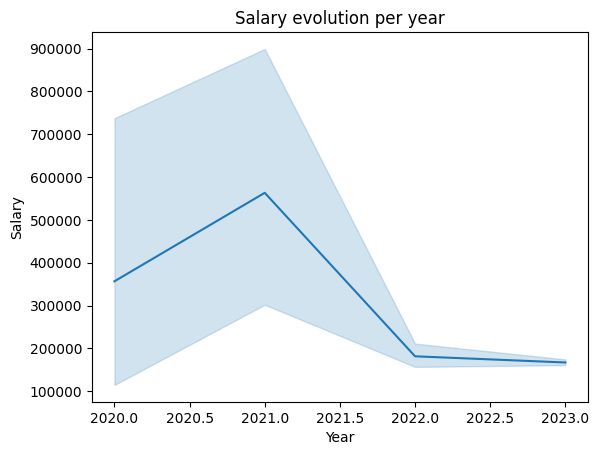

In [65]:
sns.lineplot(data=salarios, x='Year', y='salary')

plt.title('Salary evolution per year')
plt.xlabel('Year')
plt.ylabel('Salary')


plt.show()

AQUI PODEMOS OBSERAVR COMO EL SALARIO EN GENERAL COMENZO CON UN GRAN CRECIMIENTO, PERO POR ALGUN MOTIVO QUE AUN NO CONOCEMOS, A PARTIR DEL 2021 COMENZO A CAER Y SE MANTUVO MEDIANAMENTE ESTABLE A COMIENZOS DEL 2022 Y CONTINUO DE ESA FORMA DURANTE EL TRANSCURSO DE LOS AÑOS INCLUYENDO EL PRESENTE AÑO 2023

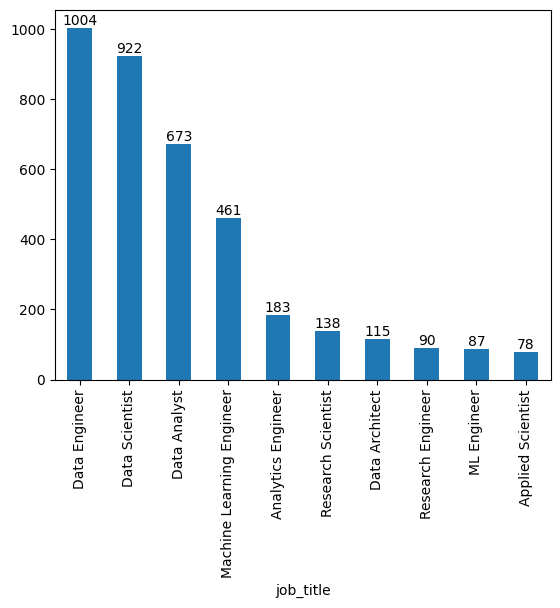

In [54]:

job_experience = salarios.groupby('job_title')['salary'].count().nlargest(10)
ax = job_experience.plot(kind='bar', xticks=range(len(job_experience)), rot=0)


for i, v in enumerate(job_experience):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xticks(range(len(job_experience)), job_experience.index)
plt.xticks(rotation=90)
plt.show()

THE MOST PREDOMINANT JOBS ACCORDING TO THE DATASET ARE THOSE RELATED TO THE WORLD OF DATA, MACHINE LEARNING, ENGINEERS AND SCIENTISTS.

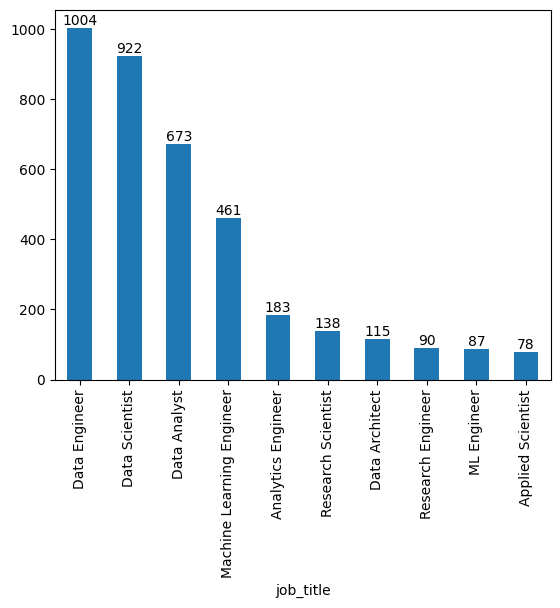

In [55]:

job_experience = salarios.groupby('job_title')['experience_level'].count().nlargest(10)
ax = job_experience.plot(kind='bar', xticks=range(len(job_experience)), rot=0)


for i, v in enumerate(job_experience):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.xticks(range(len(job_experience)), job_experience.index)
plt.xticks(rotation=90)
plt.show()

ALSO WITHIN THE WORLD OF DATA, ARE THOSE WHICH ARE ATTRIBUTED THE GREATEST AMOUNT OF EXPERTISE.

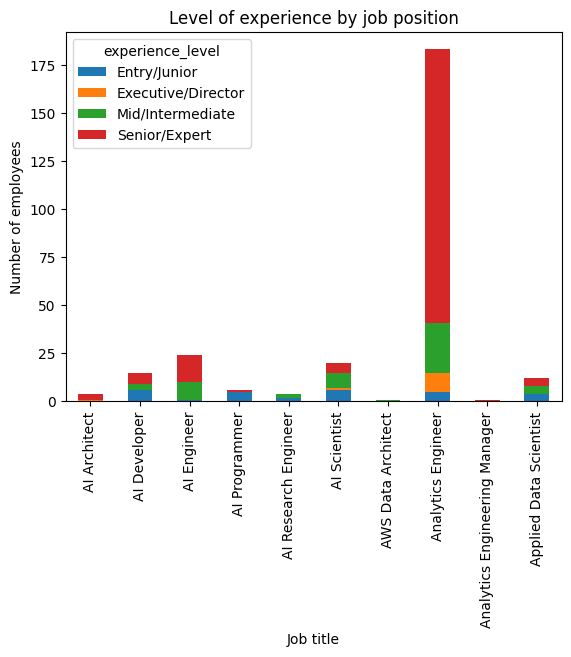

In [66]:
salarios_agrupado = salarios.groupby('job_title')['experience_level'].value_counts().unstack().head(10)

salarios_agrupado.plot(kind='bar', stacked=True)
                       
plt.xlabel('Job title')
plt.ylabel('Number of employees')
plt.title('Level of experience by job position')


plt.show()

HERE WE CAN OBSERVE IN A MORE DETAILED WAY, THE EXPERIENCE THAT PREDOMINATES IN EACH JOB POSITION.

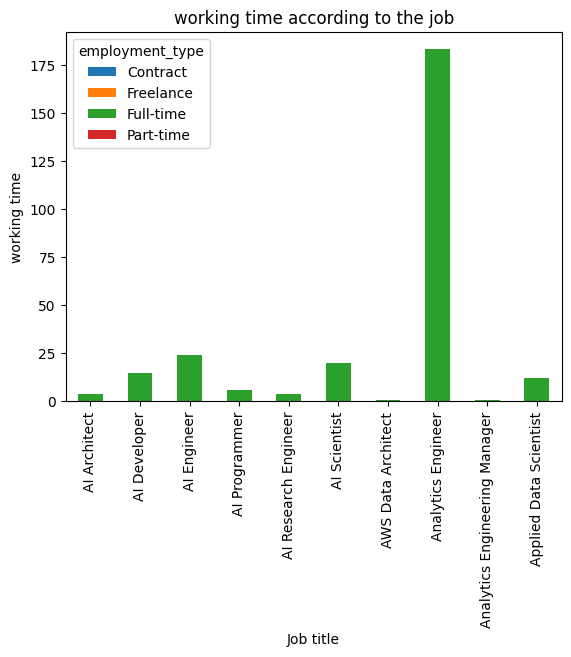

In [67]:
employment_agrupado = salarios.groupby('job_title')['employment_type'].value_counts().unstack().head(10)

employment_agrupado.plot(kind='bar', stacked=True)
                       
plt.xlabel('Job title')
plt.ylabel('working time')
plt.title('working time according to the job')

plt.show()

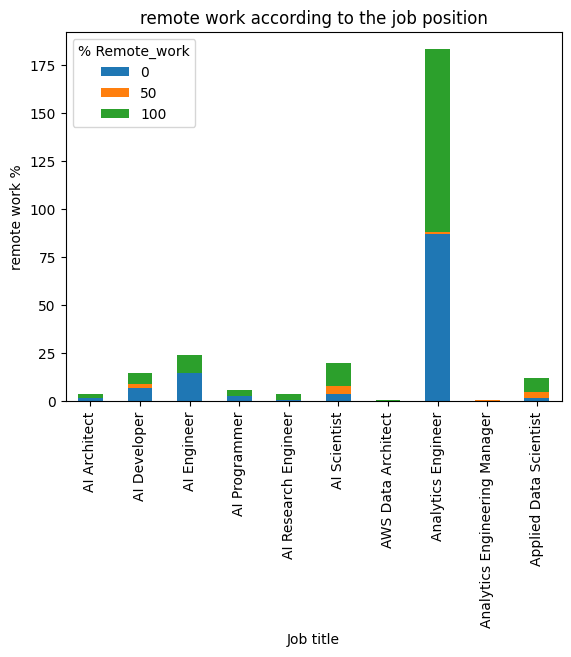

In [69]:
employment_agrupado = salarios.groupby('job_title')['% Remote_work'].value_counts().unstack().head(10)

employment_agrupado.plot(kind='bar', stacked=True)
                       
plt.xlabel('Job title')
plt.ylabel('remote work %')
plt.title('remote work according to the job position')

plt.show()

REMOTE WORK THAT PREDOMINATES ACCORDING TO JOB POSITION

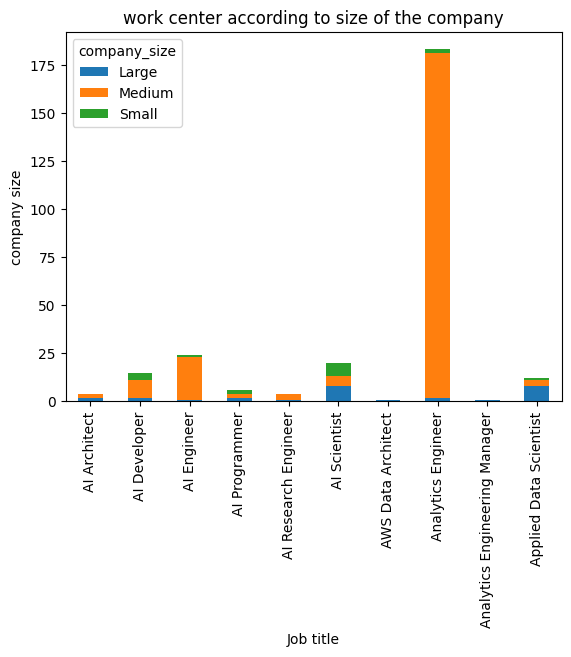

In [70]:
employment_agrupado = salarios.groupby('job_title')['company_size'].value_counts().unstack().head(10)

employment_agrupado.plot(kind='bar', stacked=True)
                       
plt.xlabel('Job title')
plt.ylabel('company size')
plt.title('work center according to size of the company')

plt.show()

HERE WE CAN SEE WHICH JOB POSITION IS MORE PREDOMINANT ACCORDING TO THE TYPE OF COMPANY.

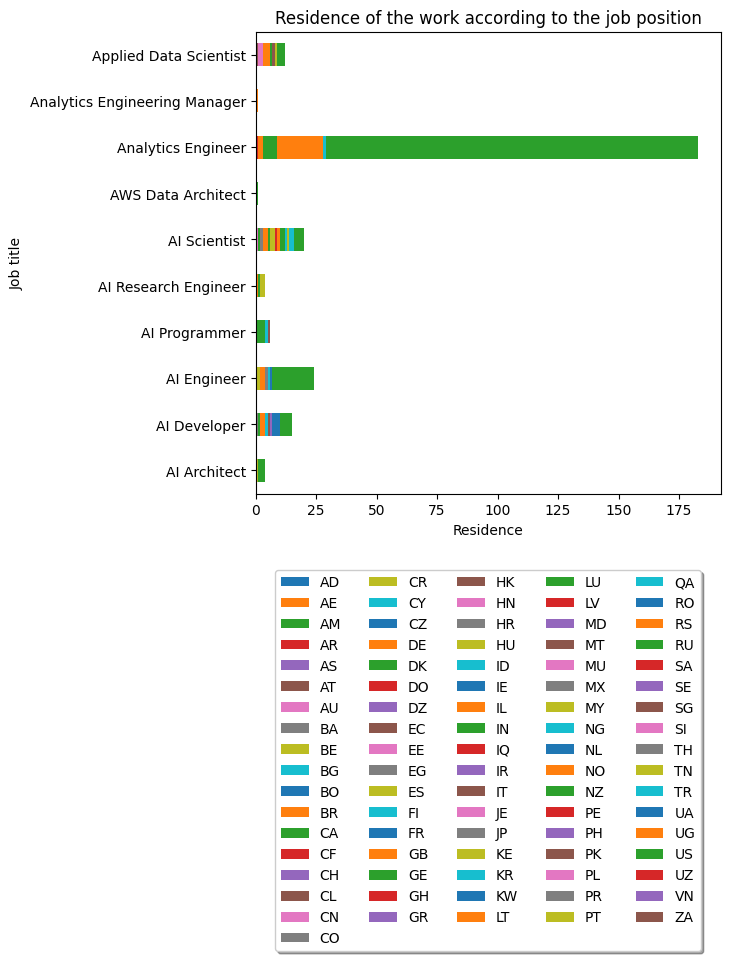

In [71]:
employment_agrupado = salarios.groupby('job_title')['employee_residence'].value_counts().unstack().head(10)

fig, ax = plt.subplots(figsize=(6, 6))

employment_agrupado.plot(kind='barh', stacked=True, ax=ax)

plt.xlabel('Residence')
plt.ylabel('Job title')
plt.title('Residence of the work according to the job position')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)

plt.show()


HERE WE CAN SEE WHICH RESIDENCE IS MORE PREDOMINANT DEPENDING ON THE TYPE OF WORK.

IN CONCLUSION WE CAN DETERMINE THAT AFTER THE PANDEMIC THAT THE WORLD WENT THROUGH, FULL-TIME WORK, REMOTE WORK TOGETHER WITH HYBRID WORK, WERE PART OF AN EVOLUTION IN THE LABOR ENVIRONMENT, AS WELL AS THE EXPONENTIAL GROWTH OF EXPERIENCE IN CERTAIN LABOR AREAS WAS GENERATED MOSTLY BY THOSE PEOPLE WHO PERFORMED FREELANCE WORK, ALLOWING THEM TO ACQUIRE THE NECESSARY EXPERIENCE TO BE ABLE TO JOIN A COMPANY. ALSO WE CANNOT LEAVE ASIDE THE GROWTH OF THE SALARY IN THE MEDIUM COMPANIES AND HOW IT WAS DECREASING IN THE BIG COMPANIES. THE GROWTH OF THE SALARY IN FUNCTION OF THE EXPERIENCE ALTHOUGH IT IS NOT EQUATED BETWEEN SOMEONE WITH AN AVERAGE LEVEL AND SOMEONE WITH AN EXPERT LEVEL, BUT WE CAN OBSERVE THAT THOSE SALARIES WERE GROWING DURING THE EVOLUTION OF THE WORK AND THE TECHNOLOGY.